In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

For both lambda = 0.01 and 0.08 do:
- Do Minimal basis pCQED (Nel = 2, Np = 2)
- Do large basis pCQED (Nel = 50, Np = 10)
- Do minimal basis QED-FCI (Np = 1)
- Do large basis QED-FCI (Np = 6)

In [30]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [2]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}

scqed_dict_np_6 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 6
}

scqed_dict_np_1 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 1
}


mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)

pcqed_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    pcqed_dict
)

scqed_res_np_1 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np_1
)

scqed_res_np_6 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np_6
)




Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.2799069881439209 seconds
 Completed 1HSO Build in 4.601478576660156e-05 seconds
 Completed ERI Build in 0.0011472702026367188 seconds 
 Completed 2D build in 0.00012183189392089844 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed determinant list in 0.0004608631134033203 seconds 
 Completed constant offset matrix in 0.000216960906982

In [3]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 50
r_array = np.linspace(1.4, 2.2, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
sc_E_array_np_1 = np.zeros((N_R, 10))
sc_E_array_np_6 = np.zeros((N_R, 10))

psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    # pcqed results
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    assert np.isclose(fci_energy, pcqed_res.CIeigs[0], 1e-7)
    
    # sort out states with dipole-allowed transition from ground state
    singlet_states = pcqed_res.sort_dipole_allowed_states( N_el)
    
    # store values
    E_array[r_idx, :] = pcqed_res.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = pcqed_res.compute_dipole_moments(singlet_states)
    
    # scqed results
    cqed_res_np_1 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np_1)
    sc_E_array_np_1[r_idx, :] = cqed_res_np_1.CIeigs[:10]
    cqed_res_np_6 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np_6)
    sc_E_array_np_6[r_idx, :] = cqed_res_np_6.CIeigs[:10]

    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.08861494064331055 seconds
 Completed 1HSO Build in 4.029273986816406e-05 seconds
 Completed ERI Build in 0.0011718273162841797 seconds 
 Completed 2D build in 0.00010085105895996094 seconds
 Completed 1G build in 1.71661376953125e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determinant list in 0.0004851818084716797 seconds 
 Completed constant offset matri

 Completed Hamiltonian build in 0.35541701316833496 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6723924436686559
CQED-RHF One-electron energy      = -12.6718407045398536
Nuclear repulsion energy          = 1.1208796825430838
Dipole energy                     = 0.0005215421427508
SCF Iteration   1: Energy = -7.8611929148683970   dE = -7.86119E+00   dRMS = 1.27946E-05
SCF Iteration   2: Energy = -7.8611929231120516   dE = -8.24365E-09   dRMS = 1.67946E-06
SCF Iteration   3: Energy = -7.8611929234482503   dE = -3.36199E-10   dRMS = 7.45464E-07
SCF Iteration   4: Energy = -7.8611929235268772   dE = -7.86269E-11   dRMS = 3.97635E-07
SCF Iteration   5: Energy = -7.8611929235486997   dE = -2.18225E-11   dRMS = 2.10672E-07
SCF Iteration   6: Energy = -7.8611929235547944   dE = -6.09468E-12   dRMS = 1.11360E-07
SCF Iteration   7: Energy = -7.8611929235564943   dE = -1.69997E-12   dRMS = 5.88399E-08
SCF Iteration   8: Energy = -7.8611929235569686   dE = -4.74287E-13  

 Completed Hamiltonian build in 0.3687889575958252 seconds

Li
H 1 1.4489795918367345
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6287313839641975
CQED-RHF One-electron energy      = -12.6287313839641975
Nuclear repulsion energy          = 1.0956204220914088
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8625393734213294   dE = -7.86254E+00   dRMS = 2.34330E-13
SCF Iteration   2: Energy = -7.8625393734213294   dE =  0.00000E+00   dRMS = 5.23612E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86253937 hartree
Psi4  SCF energy: -7.86253937 hartree
 Completed QED-RHF in 0.08757209777832031 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011608600616455078 seconds 
 Completed 2D build in 7.43865966796875e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 3.910064697265625e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.35422706604003906 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6073028869779655
CQED-RHF One-electron energy      = -12.6067321951111921
Nuclear repulsion energy          = 1.0834129522073814
Dipole energy                     = 0.0005374329667495
SCF Iteration   1: Energy = -7.8627729893522824   dE = -7.86277E+00   dRMS = 1.27910E-05
SCF Iteration   2: Energy = -7.8627729985448349   dE = -9.19255E-09   dRMS = 2.11009E-06
SCF Iteration   3: Energy = -7.8627729991414546   dE = -5.96620E-10   dRMS = 1.03359E-06
SCF Iteration   4: Energy = -7.8627729992927593   dE = -1.51305E-10   dRMS = 5.50187E-07
SCF Iteration   5: Energy = -7.8627729993347630   dE = -4.20037E-11   dRMS = 2.90879E-07
SCF Iteration   6: Energy = -7.8627729993464479   dE = -1.16849E-11   dRMS = 1.53518E-07
SCF Iteration   7: Energy = -7.8627729993497022   dE = -3.25429E-12   dRMS = 8.09971E-08
SCF Iteration   8: Energy = -7.8627729993506099   dE = -9.07718E-13  

 Completed Hamiltonian build in 0.3644111156463623 seconds

Li
H 1 1.4979591836734694
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5652261719185372
CQED-RHF One-electron energy      = -12.5652261719185372
Nuclear repulsion energy          = 1.0597963210965946
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633474272477120   dE = -7.86335E+00   dRMS = 3.49362E-13
SCF Iteration   2: Energy = -7.8633474272477137   dE = -1.77636E-15   dRMS = 7.88282E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86334743 hartree
Psi4  SCF energy: -7.86334743 hartree
 Completed QED-RHF in 0.08712387084960938 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011577606201171875 seconds 
 Completed 2D build in 7.200241088867188e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 4.00543212890625e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.36302685737609863 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5445686059621977
CQED-RHF One-electron energy      = -12.5439781819006342
Nuclear repulsion energy          = 1.0483699456669811
Dipole energy                     = 0.0005537690455252
SCF Iteration   1: Energy = -7.8632151575827338   dE = -7.86322E+00   dRMS = 1.29054E-05
SCF Iteration   2: Energy = -7.8632151681230704   dE = -1.05403E-08   dRMS = 2.59606E-06
SCF Iteration   3: Energy = -7.8632151690764678   dE = -9.53397E-10   dRMS = 1.32838E-06
SCF Iteration   4: Energy = -7.8632151693271970   dE = -2.50729E-10   dRMS = 7.05812E-07
SCF Iteration   5: Energy = -7.8632151693967769   dE = -6.95799E-11   dRMS = 3.72730E-07
SCF Iteration   6: Energy = -7.8632151694161179   dE = -1.93410E-11   dRMS = 1.96563E-07
SCF Iteration   7: Energy = -7.8632151694214878   dE = -5.36993E-12   dRMS = 1.03633E-07
SCF Iteration   8: Energy = -7.8632151694229870   dE = -1.49925E-12  

 Completed Hamiltonian build in 0.3846719264984131 seconds

Li
H 1 1.546938775510204
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5039922443862999
CQED-RHF One-electron energy      = -12.5039922443862999
Nuclear repulsion energy          = 1.0262407647558049
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8631204887311927   dE = -7.86312E+00   dRMS = 2.84205E-13
SCF Iteration   2: Energy = -7.8631204887311945   dE = -1.77636E-15   dRMS = 6.35634E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86312049 hartree
Psi4  SCF energy: -7.86312049 hartree
 Completed QED-RHF in 0.10892891883850098 seconds
 Completed 1HSO Build in 7.772445678710938e-05 seconds
 Completed ERI Build in 0.0013391971588134766 seconds 
 Completed 2D build in 0.0001327991485595703 seconds
 Completed 1G build in 0.0074841976165771484 seconds
 Completed the Dipole Matrix Build in 0.0001289844512939453 seconds
 Completed determin

 Completed Hamiltonian build in 0.36348581314086914 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4840645825417127
CQED-RHF One-electron energy      = -12.4834536265974130
Nuclear repulsion energy          = 1.0155228455416452
Dipole energy                     = 0.0005705656574694
SCF Iteration   1: Energy = -7.8626696841207062   dE = -7.86267E+00   dRMS = 1.31406E-05
SCF Iteration   2: Energy = -7.8626696964462495   dE = -1.23255E-08   dRMS = 3.12074E-06
SCF Iteration   3: Energy = -7.8626696978634838   dE = -1.41723E-09   dRMS = 1.63156E-06
SCF Iteration   4: Energy = -7.8626696982436117   dE = -3.80128E-10   dRMS = 8.65890E-07
SCF Iteration   5: Energy = -7.8626696983491486   dE = -1.05537E-10   dRMS = 4.57083E-07
SCF Iteration   6: Energy = -7.8626696983784710   dE = -2.93223E-11   dRMS = 2.41013E-07
SCF Iteration   7: Energy = -7.8626696983866280   dE = -8.15703E-12   dRMS = 1.27057E-07
SCF Iteration   8: Energy = -7.8626696983888857   dE = -2.25775E-12  

 Completed Hamiltonian build in 0.36847591400146484 seconds

Li
H 1 1.5959183673469388
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.4449088519790934
CQED-RHF One-electron energy      = -12.4449088519790934
Nuclear repulsion energy          = 0.9947448845075447
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8619952454882620   dE = -7.86200E+00   dRMS = 3.54139E-13
SCF Iteration   2: Energy = -7.8619952454882549   dE =  7.10543E-15   dRMS = 7.97339E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86199525 hartree
Psi4  SCF energy: -7.86199525 hartree
 Completed QED-RHF in 0.09229898452758789 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011539459228515625 seconds 
 Completed 2D build in 8.082389831542969e-05 seconds
 Completed 1G build in 1.52587890625e-05 seconds
 Completed the Dipole Matrix Build in 4.100799560546875e-05 seconds
 Completed determinan

 Completed Hamiltonian build in 0.3550450801849365 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4256725108192843
CQED-RHF One-electron energy      = -12.4250402040074004
Nuclear repulsion energy          = 0.9846715185884811
Dipole energy                     = 0.0005878331289121
SCF Iteration   1: Energy = -7.8612669995263253   dE = -7.86127E+00   dRMS = 1.34974E-05
SCF Iteration   2: Energy = -7.8612670141209460   dE = -1.45946E-08   dRMS = 3.67729E-06
SCF Iteration   3: Energy = -7.8612670161222482   dE = -2.00130E-09   dRMS = 1.94482E-06
SCF Iteration   4: Energy = -7.8612670166657885   dE = -5.43540E-10   dRMS = 1.03161E-06
SCF Iteration   5: Energy = -7.8612670168168712   dE = -1.51083E-10   dRMS = 5.44669E-07
SCF Iteration   6: Energy = -7.8612670168588927   dE = -4.20215E-11   dRMS = 2.87311E-07
SCF Iteration   7: Energy = -7.8612670168705812   dE = -1.16884E-11   dRMS = 1.51530E-07
SCF Iteration   8: Energy = -7.8612670168738248   dE = -3.24363E-12   

 Completed Hamiltonian build in 0.362628698348999 seconds

Li
H 1 1.6448979591836734
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3878629883869475
CQED-RHF One-electron energy      = -12.3878629883869475
Nuclear repulsion energy          = 0.9651246894353599
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8600906155111119   dE = -7.86009E+00   dRMS = 2.63200E-15
SCF Iteration   2: Energy = -7.8600906155111154   dE = -3.55271E-15   dRMS = 6.61320E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86009062 hartree
Psi4  SCF energy: -7.86009062 hartree
 Completed QED-RHF in 0.09104704856872559 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011582374572753906 seconds 
 Completed 2D build in 7.390975952148438e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.00543212890625e-05 seconds
 Completed determin

 Completed Hamiltonian build in 0.3567330837249756 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3692821733550495
CQED-RHF One-electron energy      = -12.3686276791210581
Nuclear repulsion energy          = 0.9556394345023342
Dipole energy                     = 0.0006055765645754
SCF Iteration   1: Energy = -7.8591206901204576   dE = -7.85912E+00   dRMS = 1.39740E-05
SCF Iteration   2: Energy = -7.8591207075220471   dE = -1.74016E-08   dRMS = 4.26315E-06
SCF Iteration   3: Energy = -7.8591207102431007   dE = -2.72105E-09   dRMS = 2.26969E-06
SCF Iteration   4: Energy = -7.8591207109888632   dE = -7.45763E-10   dRMS = 1.20397E-06
SCF Iteration   5: Energy = -7.8591207111965655   dE = -2.07702E-10   dRMS = 6.36116E-07
SCF Iteration   6: Energy = -7.8591207112544303   dE = -5.78648E-11   dRMS = 3.35835E-07
SCF Iteration   7: Energy = -7.8591207112705543   dE = -1.61240E-11   dRMS = 1.77278E-07
SCF Iteration   8: Energy = -7.8591207112750467   dE = -4.49241E-12   

 Completed Hamiltonian build in 0.3672940731048584 seconds

Li
H 1 1.693877551020408
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3327501550001326
CQED-RHF One-electron energy      = -12.3327501550001326
Nuclear repulsion energy          = 0.9372174694998797
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8575103510438193   dE = -7.85751E+00   dRMS = 3.48276E-15
SCF Iteration   2: Energy = -7.8575103510438247   dE = -5.32907E-15   dRMS = 8.82635E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85751035 hartree
Psi4  SCF energy: -7.85751035 hartree
 Completed QED-RHF in 0.09348034858703613 seconds
 Completed 1HSO Build in 4.1961669921875e-05 seconds
 Completed ERI Build in 0.0011472702026367188 seconds 
 Completed 2D build in 7.390975952148438e-05 seconds
 Completed 1G build in 1.4781951904296875e-05 seconds
 Completed the Dipole Matrix Build in 4.315376281738281e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.3647780418395996 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3147919571681008
CQED-RHF One-electron energy      = -12.3141144235910840
Nuclear repulsion energy          = 0.9282702860201670
Dipole energy                     = 0.0006237958378499
SCF Iteration   1: Energy = -7.8563299339356583   dE = -7.85633E+00   dRMS = 1.45669E-05
SCF Iteration   2: Energy = -7.8563299547434760   dE = -2.08078E-08   dRMS = 4.87770E-06
SCF Iteration   3: Energy = -7.8563299583376818   dE = -3.59421E-09   dRMS = 2.60751E-06
SCF Iteration   4: Energy = -7.8563299593300293   dE = -9.92348E-10   dRMS = 1.38387E-06
SCF Iteration   5: Energy = -7.8563299596071303   dE = -2.77101E-10   dRMS = 7.31964E-07
SCF Iteration   6: Energy = -7.8563299596845262   dE = -7.73959E-11   dRMS = 3.86912E-07
SCF Iteration   7: Energy = -7.8563299597061445   dE = -2.16183E-11   dRMS = 2.04495E-07
SCF Iteration   8: Energy = -7.8563299597121770   dE = -6.03251E-12   

 Completed Hamiltonian build in 0.3639190196990967 seconds

Li
H 1 1.7428571428571429
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2794744734878982
CQED-RHF One-electron energy      = -12.2794744734878982
Nuclear repulsion energy          = 0.9108788052516398
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8543451780812816   dE = -7.85435E+00   dRMS = 4.17032E-15
SCF Iteration   2: Energy = -7.8543451780812727   dE =  8.88178E-15   dRMS = 1.02765E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85434518 hartree
Psi4  SCF energy: -7.85434518 hartree
 Completed QED-RHF in 0.09244179725646973 seconds
 Completed 1HSO Build in 4.1961669921875e-05 seconds
 Completed ERI Build in 0.0012760162353515625 seconds 
 Completed 2D build in 0.0001800060272216797 seconds
 Completed 1G build in 2.002716064453125e-05 seconds
 Completed the Dipole Matrix Build in 4.601478576660156e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.356748104095459 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2621088047830202
CQED-RHF One-electron energy      = -12.2614073670288750
Nuclear repulsion energy          = 0.9024251736483759
Dipole energy                     = 0.0006424857290687
SCF Iteration   1: Energy = -7.8529815106500065   dE = -7.85298E+00   dRMS = 1.52712E-05
SCF Iteration   2: Energy = -7.8529815355320034   dE = -2.48820E-08   dRMS = 5.52130E-06
SCF Iteration   3: Energy = -7.8529815401726895   dE = -4.64069E-09   dRMS = 2.95944E-06
SCF Iteration   4: Energy = -7.8529815414622677   dE = -1.28958E-09   dRMS = 1.57204E-06
SCF Iteration   5: Energy = -7.8529815418235041   dE = -3.61236E-10   dRMS = 8.32681E-07
SCF Iteration   6: Energy = -7.8529815419247226   dE = -1.01219E-10   dRMS = 4.40827E-07
SCF Iteration   7: Energy = -7.8529815419530804   dE = -2.83578E-11   dRMS = 2.33354E-07
SCF Iteration   8: Energy = -7.8529815419610225   dE = -7.94209E-12   d

 Completed Hamiltonian build in 0.36324572563171387 seconds

Li
H 1 1.7918367346938777
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2279483802846354
CQED-RHF One-electron energy      = -12.2279483802846354
Nuclear repulsion energy          = 0.8859800679782459
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8506745764107793   dE = -7.85067E+00   dRMS = 5.05083E-15
SCF Iteration   2: Energy = -7.8506745764107757   dE =  3.55271E-15   dRMS = 1.33471E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85067458 hartree
Psi4  SCF energy: -7.85067458 hartree
 Completed QED-RHF in 0.09085893630981445 seconds
 Completed 1HSO Build in 4.315376281738281e-05 seconds
 Completed ERI Build in 0.0011966228485107422 seconds 
 Completed 2D build in 8.606910705566406e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 4.100799560546875e-05 seconds
 Completed deter

 Completed Hamiltonian build in 0.36734509468078613 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2111478090659364
CQED-RHF One-electron energy      = -12.2104215919327821
Nuclear repulsion energy          = 0.8779802479513544
Dipole energy                     = 0.0006616361249733
SCF Iteration   1: Energy = -7.8491514804747879   dE = -7.84915E+00   dRMS = 1.60813E-05
SCF Iteration   2: Energy = -7.8491515101749965   dE = -2.97002E-08   dRMS = 6.19475E-06
SCF Iteration   3: Energy = -7.8491515160576544   dE = -5.88266E-09   dRMS = 3.32647E-06
SCF Iteration   4: Energy = -7.8491515177021434   dE = -1.64449E-09   dRMS = 1.76914E-06
SCF Iteration   5: Energy = -7.8491515181644900   dE = -4.62347E-10   dRMS = 9.38676E-07
SCF Iteration   6: Energy = -7.8491515182945051   dE = -1.30015E-10   dRMS = 4.97831E-07
SCF Iteration   7: Energy = -7.8491515183310732   dE = -3.65681E-11   dRMS = 2.64005E-07
SCF Iteration   8: Energy = -7.8491515183413494   dE = -1.02762E-11  

 Completed Hamiltonian build in 0.3638789653778076 seconds

Li
H 1 1.8408163265306123
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1780920696455510
CQED-RHF One-electron energy      = -12.1780920696455510
Nuclear repulsion energy          = 0.8624063189411308
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8465682779665737   dE = -7.84657E+00   dRMS = 5.64766E-15
SCF Iteration   2: Energy = -7.8465682779665737   dE =  0.00000E+00   dRMS = 1.47592E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.84656828 hartree
Psi4  SCF energy: -7.84656828 hartree
 Completed QED-RHF in 0.09343099594116211 seconds
 Completed 1HSO Build in 5.507469177246094e-05 seconds
 Completed ERI Build in 0.0011970996856689453 seconds 
 Completed 2D build in 0.00010967254638671875 seconds
 Completed 1G build in 1.52587890625e-05 seconds
 Completed the Dipole Matrix Build in 4.076957702636719e-05 seconds
 Completed determinan

 Completed Hamiltonian build in 0.3587379455566406 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1618316008527625
CQED-RHF One-electron energy      = -12.1610797213014514
Nuclear repulsion energy          = 0.8548247249284615
Dipole energy                     = 0.0006812322168193
SCF Iteration   1: Energy = -7.8449066024373355   dE = -7.84491E+00   dRMS = 1.69912E-05
SCF Iteration   2: Energy = -7.8449066377835734   dE = -3.53462E-08   dRMS = 6.89922E-06
SCF Iteration   3: Energy = -7.8449066451282174   dE = -7.34464E-09   dRMS = 3.70948E-06
SCF Iteration   4: Energy = -7.8449066471931417   dE = -2.06492E-09   dRMS = 1.97576E-06
SCF Iteration   5: Energy = -7.8449066477760443   dE = -5.82903E-10   dRMS = 1.05031E-06
SCF Iteration   6: Energy = -7.8449066479406131   dE = -1.64569E-10   dRMS = 5.58148E-07
SCF Iteration   7: Energy = -7.8449066479870773   dE = -4.64642E-11   dRMS = 2.96584E-07
SCF Iteration   8: Energy = -7.8449066480001992   dE = -1.31219E-11   

 Completed Hamiltonian build in 0.3635261058807373 seconds

Li
H 1 1.889795918367347
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1298328042598946
CQED-RHF One-electron energy      = -12.1298328042598946
Nuclear repulsion energy          = 0.8400545352968682
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8420875414285298   dE = -7.84209E+00   dRMS = 5.74979E-15
SCF Iteration   2: Energy = -7.8420875414285334   dE = -3.55271E-15   dRMS = 1.46530E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.84208754 hartree
Psi4  SCF energy: -7.84208754 hartree
 Completed QED-RHF in 0.09223318099975586 seconds
 Completed 1HSO Build in 4.38690185546875e-05 seconds
 Completed ERI Build in 0.0011889934539794922 seconds 
 Completed 2D build in 7.295608520507812e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.410743713378906e-05 seconds
 Completed determin

 Completed Hamiltonian build in 0.3567831516265869 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1140896355219105
CQED-RHF One-electron energy      = -12.1133112051214091
Nuclear repulsion energy          = 0.8328592073714133
Dipole energy                     = 0.0007012546580435
SCF Iteration   1: Energy = -7.8403055447135142   dE = -7.84031E+00   dRMS = 1.79953E-05
SCF Iteration   2: Energy = -7.8403055866257390   dE = -4.19122E-08   dRMS = 7.63609E-06
SCF Iteration   3: Energy = -7.8403055956794088   dE = -9.05367E-09   dRMS = 4.10924E-06
SCF Iteration   4: Energy = -7.8403055982389525   dE = -2.55954E-09   dRMS = 2.19240E-06
SCF Iteration   5: Energy = -7.8403055989645942   dE = -7.25642E-10   dRMS = 1.16792E-06
SCF Iteration   6: Energy = -7.8403055991703550   dE = -2.05761E-10   dRMS = 6.21977E-07
SCF Iteration   7: Energy = -7.8403055992286959   dE = -5.83409E-11   dRMS = 3.31214E-07
SCF Iteration   8: Energy = -7.8403055992452408   dE = -1.65450E-11   

 Completed Hamiltonian build in 0.3662221431732178 seconds

Li
H 1 1.9387755102040818
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0831041773296874
CQED-RHF One-electron energy      = -12.0831041773296874
Nuclear repulsion energy          = 0.8188321049314738
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8372862467238971   dE = -7.83729E+00   dRMS = 5.13550E-15
SCF Iteration   2: Energy = -7.8372862467239006   dE = -3.55271E-15   dRMS = 1.35733E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.83728625 hartree
Psi4  SCF energy: -7.83728625 hartree
 Completed QED-RHF in 0.09987902641296387 seconds
 Completed 1HSO Build in 5.7220458984375e-05 seconds
 Completed ERI Build in 0.0012118816375732422 seconds 
 Completed 2D build in 7.891654968261719e-05 seconds
 Completed 1G build in 1.5974044799804688e-05 seconds
 Completed the Dipole Matrix Build in 4.029273986816406e-05 seconds
 Completed determin

 Completed Hamiltonian build in 0.35610413551330566 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0678574527474929
CQED-RHF One-electron energy      = -12.0670515799908227
Nuclear repulsion energy          = 0.8119942585437370
Dipole energy                     = 0.0007216796640339
SCF Iteration   1: Energy = -7.8353999268782930   dE = -7.83540E+00   dRMS = 1.90885E-05
SCF Iteration   2: Energy = -7.8353999763777074   dE = -4.94994E-08   dRMS = 8.40700E-06
SCF Iteration   3: Energy = -7.8353999874172304   dE = -1.10395E-08   dRMS = 4.52646E-06
SCF Iteration   4: Energy = -7.8353999905550724   dE = -3.13784E-09   dRMS = 2.41955E-06
SCF Iteration   5: Energy = -7.8353999914487238   dE = -8.93651E-10   dRMS = 1.29178E-06
SCF Iteration   6: Energy = -7.8353999917032704   dE = -2.54547E-10   dRMS = 6.89500E-07
SCF Iteration   7: Energy = -7.8353999917757724   dE = -7.25020E-11   dRMS = 3.68005E-07
SCF Iteration   8: Energy = -7.8353999917964243   dE = -2.06519E-11  

 Completed Hamiltonian build in 0.36542582511901855 seconds

Li
H 1 1.9877551020408164
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0378453834023116
CQED-RHF One-electron energy      = -12.0378453834023116
Nuclear repulsion energy          = 0.7986555438243326
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8322118427751297   dE = -7.83221E+00   dRMS = 4.20813E-15
SCF Iteration   2: Energy = -7.8322118427751226   dE =  7.10543E-15   dRMS = 1.09414E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.83221184 hartree
Psi4  SCF energy: -7.83221184 hartree
 Completed QED-RHF in 0.09486603736877441 seconds
 Completed 1HSO Build in 4.291534423828125e-05 seconds
 Completed ERI Build in 0.0012180805206298828 seconds 
 Completed 2D build in 7.414817810058594e-05 seconds
 Completed 1G build in 1.9788742065429688e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.3560678958892822 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0230759592923349
CQED-RHF One-electron energy      = -12.0222417517561286
Nuclear repulsion energy          = 0.7921491850151733
Dipole energy                     = 0.0007424790552458
SCF Iteration   1: Energy = -7.8302352246494298   dE = -7.83024E+00   dRMS = 2.02668E-05
SCF Iteration   2: Energy = -7.8302352828688058   dE = -5.82194E-08   dRMS = 9.21385E-06
SCF Iteration   3: Energy = -7.8302352962038295   dE = -1.33350E-08   dRMS = 4.96176E-06
SCF Iteration   4: Energy = -7.8302353000141434   dE = -3.81031E-09   dRMS = 2.65766E-06
SCF Iteration   5: Energy = -7.8302353011044072   dE = -1.09026E-09   dRMS = 1.42219E-06
SCF Iteration   6: Energy = -7.8302353014164048   dE = -3.11998E-10   dRMS = 7.60880E-07
SCF Iteration   7: Energy = -7.8302353015056969   dE = -8.92921E-11   dRMS = 4.07055E-07
SCF Iteration   8: Energy = -7.8302353015312480   dE = -2.55511E-11   

 Completed Hamiltonian build in 0.3657979965209961 seconds

Li
H 1 2.036734693877551
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9940005347543099
CQED-RHF One-electron energy      = -11.9940005347543099
Nuclear repulsion energy          = 0.7794493984818638
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8269061742195056   dE = -7.82691E+00   dRMS = 3.44108E-15
SCF Iteration   2: Energy = -7.8269061742195056   dE =  0.00000E+00   dRMS = 1.04970E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.82690617 hartree
Psi4  SCF energy: -7.82690617 hartree
 Completed QED-RHF in 0.09372115135192871 seconds
 Completed 1HSO Build in 4.506111145019531e-05 seconds
 Completed ERI Build in 0.0012080669403076172 seconds 
 Completed 2D build in 7.486343383789062e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.36047816276550293 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9796907659129843
CQED-RHF One-electron energy      = -11.9788273322447054
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0007636202597928
SCF Iteration   1: Energy = -7.8248515607721156   dE = -7.82485E+00   dRMS = 2.15268E-05
SCF Iteration   2: Energy = -7.8248516289673837   dE = -6.81953E-08   dRMS = 1.00588E-05
SCF Iteration   3: Energy = -7.8248516449437755   dE = -1.59764E-08   dRMS = 5.41574E-06
SCF Iteration   4: Energy = -7.8248516495321887   dE = -4.58841E-09   dRMS = 2.90715E-06
SCF Iteration   5: Energy = -7.8248516508513433   dE = -1.31915E-09   dRMS = 1.55937E-06
SCF Iteration   6: Energy = -7.8248516512306470   dE = -3.79304E-10   dRMS = 8.36259E-07
SCF Iteration   7: Energy = -7.8248516513397171   dE = -1.09070E-10   dRMS = 4.48448E-07
SCF Iteration   8: Energy = -7.8248516513710769   dE = -3.13598E-11  

 Completed Hamiltonian build in 0.3674139976501465 seconds

Li
H 1 2.085714285714286
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9515180443788989
CQED-RHF One-electron energy      = -11.9515180443788989
Nuclear repulsion energy          = 0.7611453030184931
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8214062070316928   dE = -7.82141E+00   dRMS = 2.41382E-13
SCF Iteration   2: Energy = -7.8214062070316892   dE =  3.55271E-15   dRMS = 6.43822E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.82140621 hartree
Psi4  SCF energy: -7.82140621 hartree
 Completed QED-RHF in 0.08990597724914551 seconds
 Completed 1HSO Build in 4.291534423828125e-05 seconds
 Completed ERI Build in 0.0011970996856689453 seconds 
 Completed 2D build in 7.390975952148438e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.601478576660156e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.3743271827697754 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9376515950767654
CQED-RHF One-electron energy      = -11.9367580467996319
Nuclear repulsion energy          = 0.7552334948397089
Dipole energy                     = 0.0007850663022586
SCF Iteration   1: Energy = -7.8192844003701598   dE = -7.81928E+00   dRMS = 2.28663E-05
SCF Iteration   2: Energy = -7.8192844799332892   dE = -7.95631E-08   dRMS = 1.09445E-05
SCF Iteration   3: Energy = -7.8192844989368968   dE = -1.90036E-08   dRMS = 5.88891E-06
SCF Iteration   4: Energy = -7.8192845044215211   dE = -5.48462E-09   dRMS = 3.16843E-06
SCF Iteration   5: Energy = -7.8192845060058431   dE = -1.58432E-09   dRMS = 1.70355E-06
SCF Iteration   6: Energy = -7.8192845064635801   dE = -4.57737E-10   dRMS = 9.15757E-07
SCF Iteration   7: Energy = -7.8192845065958281   dE = -1.32248E-10   dRMS = 4.92252E-07
SCF Iteration   8: Energy = -7.8192845066340428   dE = -3.82148E-11   

 Completed Hamiltonian build in 0.36512017250061035 seconds

Li
H 1 2.1346938775510207
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9103500847605819
CQED-RHF One-electron energy      = -11.9103500847605819
Nuclear repulsion energy          = 0.7436811660467495
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8157446684501286   dE = -7.81574E+00   dRMS = 3.25028E-13
SCF Iteration   2: Energy = -7.8157446684500949   dE =  3.37508E-14   dRMS = 8.72837E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.81574467 hartree
Psi4  SCF energy: -7.81574467 hartree
 Completed QED-RHF in 0.08889412879943848 seconds
 Completed 1HSO Build in 4.506111145019531e-05 seconds
 Completed ERI Build in 0.00127410888671875 seconds 
 Completed 2D build in 0.00012063980102539062 seconds
 Completed 1G build in 2.8371810913085938e-05 seconds
 Completed the Dipole Matrix Build in 4.887580871582031e-05 seconds
 Completed determ

 Completed Hamiltonian build in 0.357105016708374 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8969117654642922
CQED-RHF One-electron energy      = -11.8959872185925786
Nuclear repulsion energy          = 0.7380365272152751
Dipole energy                     = 0.0008067758117580
SCF Iteration   1: Energy = -7.8135651648962909   dE = -7.81357E+00   dRMS = 2.42842E-05
SCF Iteration   2: Energy = -7.8135652573695609   dE = -9.24733E-08   dRMS = 1.18737E-05
SCF Iteration   3: Energy = -7.8135652798302502   dE = -2.24607E-08   dRMS = 6.38170E-06
SCF Iteration   4: Energy = -7.8135652863427332   dE = -6.51248E-09   dRMS = 3.44186E-06
SCF Iteration   5: Energy = -7.8135652882328301   dE = -1.89010E-09   dRMS = 1.85490E-06
SCF Iteration   6: Energy = -7.8135652887814651   dE = -5.48635E-10   dRMS = 9.99461E-07
SCF Iteration   7: Energy = -7.8135652889407368   dE = -1.59272E-10   dRMS = 5.38513E-07
SCF Iteration   8: Energy = -7.8135652889869682   dE = -4.62315E-11   d

 Completed Hamiltonian build in 0.36505794525146484 seconds

Li
H 1 2.183673469387755
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.8704521229909687
CQED-RHF One-electron energy      = -11.8704521229909687
Nuclear repulsion energy          = 0.7270004669952337
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8099506130038581   dE = -7.80995E+00   dRMS = 6.41765E-15
SCF Iteration   2: Energy = -7.8099506130038581   dE =  0.00000E+00   dRMS = 1.84787E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.80995061 hartree
Psi4  SCF energy: -7.80995061 hartree
 Completed QED-RHF in 0.09461212158203125 seconds
 Completed 1HSO Build in 5.412101745605469e-05 seconds
 Completed ERI Build in 0.0012438297271728516 seconds 
 Completed 2D build in 7.605552673339844e-05 seconds
 Completed 1G build in 1.621246337890625e-05 seconds
 Completed the Dipole Matrix Build in 4.887580871582031e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.35684871673583984 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8574277515713202
CQED-RHF One-electron energy      = -11.8564713280292686
Nuclear repulsion energy          = 0.7216052872772727
Dipole energy                     = 0.0008287030842946
SCF Iteration   1: Energy = -7.8077217754702524   dE = -7.80772E+00   dRMS = 2.57800E-05
SCF Iteration   2: Energy = -7.8077218825616548   dE = -1.07091E-07   dRMS = 1.28495E-05
SCF Iteration   3: Energy = -7.8077219089576513   dE = -2.63960E-08   dRMS = 6.89442E-06
SCF Iteration   4: Energy = -7.8077219166441534   dE = -7.68650E-09   dRMS = 3.72777E-06
SCF Iteration   5: Energy = -7.8077219188851679   dE = -2.24101E-09   dRMS = 2.01353E-06
SCF Iteration   6: Energy = -7.8077219195386469   dE = -6.53479E-10   dRMS = 1.08742E-06
SCF Iteration   7: Energy = -7.8077219197292198   dE = -1.90573E-10   dRMS = 5.87245E-07
SCF Iteration   8: Energy = -7.8077219197847949   dE = -5.55751E-11  

In [13]:
from matplotlib import pyplot as plt

#np_1_safe_1 = np.copy(sc_E_array_np_1[:,1])
#np_1_safe_2 = np.copy(sc_E_array_np_1[:,2])

#np_6_safe_1 = np.copy(sc_E_array_np_6[:,1])
#np_6_safe_2 = np.copy(sc_E_array_np_6[:,2])
#sc_E_array[:,1] = np.copy(safe_1)
#sc_E_array[:,2] = np.copy(safe_2)

sc_E_array_np_1[:,1] = np.copy(np_1_safe_1)
sc_E_array_np_1[:,2] = np.copy(np_1_safe_2)


In [18]:
nop = np.copy(sc_E_array_np_6[:8,1])
lup = np.copy(sc_E_array_np_6[:8,2])
#E_array[10,2] = nop1
#E_array[10,1] = lup1

sc_E_array_np_6[:8,2] = np.copy(nop)
sc_E_array_np_6[:8,1] = np.copy(lup)

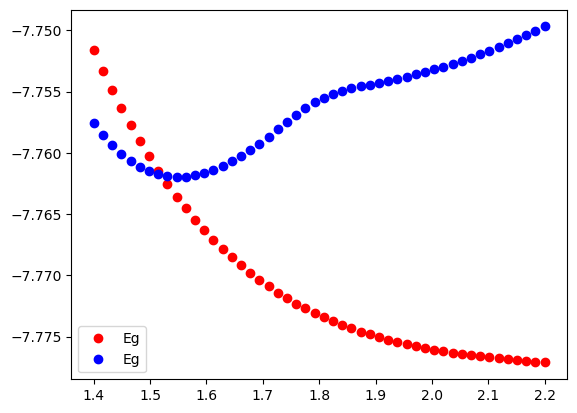

In [19]:
#print(r_array)
#print(E_array[:,1]-E_array[:,0])

#plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
#plt.plot(r_array, E_array[:,1], label="E1")
#plt.plot(r_array, E_array[:,2], label="E2")

plt.plot(r_array, sc_E_array_np_6[:,1], 'ro', label="Eg")
plt.plot(r_array, sc_E_array_np_6[:,2], 'bo', label="Eg")
#plt.plot(r_array, E_array[:,3], label="E3")
plt.legend()
#plt.xlim(1.79, 1.81)
plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [20]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [21]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.12086
lambda_vector = np.array([0., 0., 0.01])
N_el = 3
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print("H")
print(_HPF)

H
[[-7.878268 -0.000004  0.        0.       -0.001482  0.      ]
 [-0.000004 -7.736071 -0.       -0.001482  0.        0.      ]
 [ 0.       -0.       -7.6824    0.        0.        0.      ]
 [ 0.       -0.001482  0.       -7.757408 -0.000004  0.      ]
 [-0.001482  0.        0.       -0.000004 -7.615211 -0.      ]
 [ 0.        0.        0.        0.       -0.       -7.56154 ]]


In [23]:
N_el = 50
N_ph = 6
pcqed_nel50_np6 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel50_np6[k,:] = pf_e



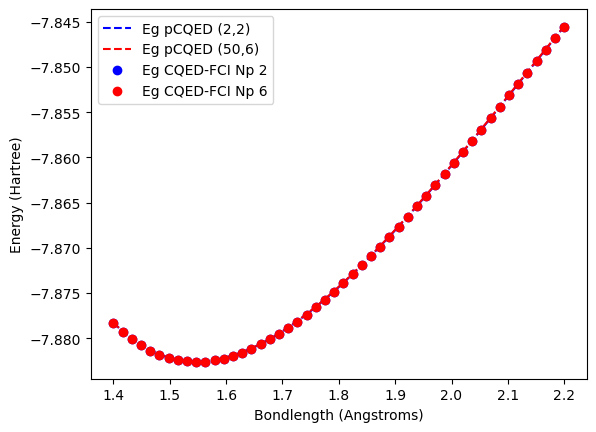

In [30]:


plt.plot(r_array, pcqed_nel2_np2[:,0], 'b--', label="Eg pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np6[:,0], 'r--', label="Eg pCQED (50,6)")
plt.plot(r_array, sc_E_array_np_1[:,0], 'bo', label="Eg CQED-FCI Np 2")
plt.plot(r_array, sc_E_array_np_6[:,0], 'ro', label="Eg CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

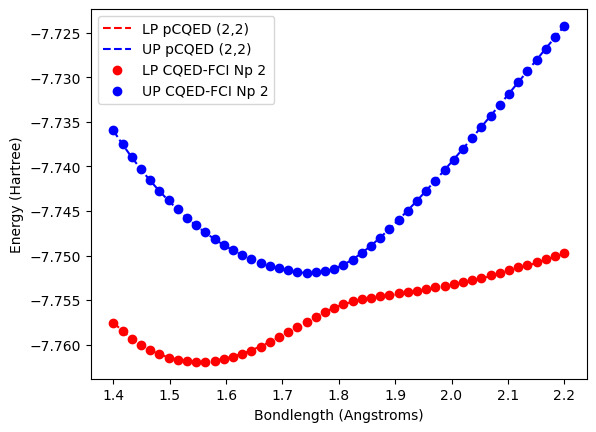

In [26]:

plt.plot(r_array, pcqed_nel2_np2[:,1], 'r--', label="LP pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'b--', label="UP pCQED (2,2)")
plt.plot(r_array, sc_E_array_np_1[:,2], 'ro', label="LP CQED-FCI Np 2")
plt.plot(r_array, sc_E_array_np_1[:,3], 'bo', label="UP CQED-FCI Np 2")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

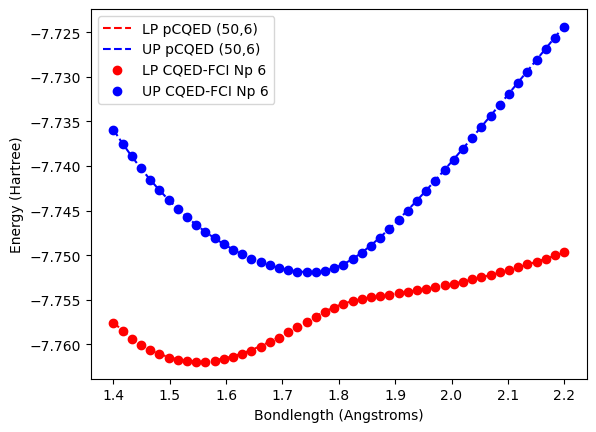

In [31]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_array_np_6[:,2], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_array_np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [58]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      

1.4, -7.865924147626063, -7.7508804267322695, -7.717905747495546, -7.681602123890912, -7.681602123890912 
1.4163265306122448, -7.8668165912420145, -7.752038213327047, -7.719139296135161, -7.683262243063789, -7.683262243063789 
1.4326530612244897, -7.867572391563767, -7.7530729217473935, -7.720260924047705, -7.68482066167049, -7.68482066167049 
1.4489795918367345, -7.868198456682805, -7.753992118673561, -7.721275024320102, -7.686282782049272, -7.686282782049272 
1.4653061224489796, -7.86870136944422, -7.754803061362124, -7.722185695280433, -7.687653712157323, -7.687653712157323 
1.4816326530612245, -7.869087406842382, -7.75551271237435, -7.722996763728171, -7.688938284362809, -7.688938284362809 
1.4979591836734694, -7.869362557990396, -7.756127752009069, -7.723711807570572, -7.690141072798909, -7.690141072798909 
1.5142857142857142, -7.869532540783363, -7.756654588523435, -7.724334178012827, -7.6912664093987555, -7.6912664093987555 
1.530612244897959, -7.8696028173659105, -7.75709936624